# 正则化

In [0]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
data = load_breast_cancer()
X = data.data
y = data.target
data.data.shape

(569, 30)

In [0]:
lrl1 = LR(penalty="l1",solver="liblinear",C=0.5,max_iter=1000)
lrl2 = LR(penalty="l2",solver="liblinear",C=0.5,max_iter=1000)
#逻辑回归的重要属性coef_，查看每个特征所对应的参数

In [4]:
lrl1 = lrl1.fit(X,y)
lrl1.coef_

array([[ 3.98901939,  0.03151962, -0.13561399, -0.01619365,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.50324724,  0.        , -0.07124533,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.24535814, -0.12831617, -0.01443434,  0.        ,
         0.        , -2.05267125,  0.        ,  0.        ,  0.        ]])

In [5]:
(lrl1.coef_ != 0).sum(axis=1)

array([10])

In [8]:
lrl1.intercept_

array([0.])

In [7]:
(lrl1.coef_ != 0).sum()

10

In [6]:
lrl2 = lrl2.fit(X,y)
lrl2.coef_

array([[ 1.61633404e+00,  1.02277077e-01,  4.86563420e-02,
        -4.51852592e-03, -9.54756952e-02, -3.01243409e-01,
        -4.58005721e-01, -2.24514795e-01, -1.37408594e-01,
        -1.92924073e-02,  1.46668746e-02,  8.80471817e-01,
         1.16506317e-01, -9.43003844e-02, -1.00224645e-02,
        -2.19490383e-02, -5.58839865e-02, -2.72462539e-02,
        -2.79145133e-02,  4.79056334e-04,  1.25205407e+00,
        -3.01377258e-01, -1.71782858e-01, -2.21295088e-02,
        -1.75737162e-01, -8.75560011e-01, -1.16422644e+00,
        -4.31675256e-01, -4.25206314e-01, -8.65919487e-02]])

In [9]:
lrl2.intercept_

array([0.29736804])

In [0]:
l1 = []
l2 = []
l1test = []
l2test = []
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3,random_state=420)
for i in np.linspace(0.05,1,19):
    lrl1 = LR(penalty="l1",solver="liblinear",C=i,max_iter=1000)
    lrl2 = LR(penalty="l2",solver="liblinear",C=i,max_iter=1000)
    lrl1 = lrl1.fit(Xtrain,Ytrain)
    l1.append(accuracy_score(lrl1.predict(Xtrain),Ytrain))
# 准确率     
    
    l1test.append(accuracy_score(lrl1.predict(Xtest),Ytest))
    
    lrl2 = lrl2.fit(Xtrain,Ytrain)
    l2.append(accuracy_score(lrl2.predict(Xtrain),Ytrain))
    
    l2test.append(accuracy_score(lrl2.predict(Xtest),Ytest))

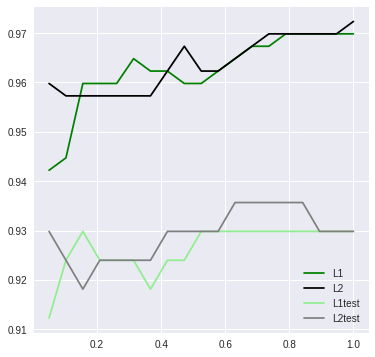

In [11]:
graph = [l1,l2,l1test,l2test]
color = ["green","black","lightgreen","gray"]
label = ["L1","L2","L1test","L2test"]
plt.figure(figsize=(6,6))
for i in range(len(graph)):
    plt.plot(np.linspace(0.05,1,19),graph[i],color[i],label=label[i])
plt.legend(loc=4) #图例的位置在哪里?4表示，右下角
plt.show()

# 逻辑回归中的特征工程

In [12]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


## 高效的嵌入法embedded

In [0]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel

In [14]:
data = load_breast_cancer()
data.data.shape

(569, 30)

In [15]:
LR_ = LR(solver="liblinear",C=0.9,random_state=420)
cross_val_score(LR_,data.data,data.target,cv=10).mean()

0.9508998790078644

In [16]:
X_embedded = SelectFromModel(LR_,norm_order=1).fit_transform(data.data,data.target)
#norm_order=1 使用L1范式进行选择
X_embedded.shape

(569, 9)

In [17]:
cross_val_score(LR_,X_embedded,data.target,cv=10).mean()

0.9368323826808401

### 调节SelectFromModel这个类中的参数threshold

In [19]:
abs((LR_.fit(data.data,data.target).coef_))

array([[2.02112622e+00, 1.15595134e-01, 4.41407883e-02, 3.45790262e-03,
        1.44387230e-01, 3.86286611e-01, 6.13773222e-01, 3.21160489e-01,
        2.10978916e-01, 2.48403009e-02, 1.64195580e-02, 1.19646054e+00,
        3.19762380e-02, 9.53617462e-02, 1.57224285e-02, 1.54689958e-04,
        4.91766910e-02, 3.79391389e-02, 3.97924547e-02, 5.36873366e-03,
        1.25304303e+00, 3.36904555e-01, 1.31363851e-01, 2.38069331e-02,
        2.67353874e-01, 1.10081531e+00, 1.51938716e+00, 6.18683272e-01,
        6.48554484e-01, 1.10434962e-01]])

(0.0, 30)
(0.10637506431899409, 17)
(0.21275012863798817, 12)
(0.3191251929569823, 11)
(0.42550025727597635, 8)
(0.5318753215949704, 8)
(0.6382503859139645, 6)
(0.7446254502329586, 5)
(0.8510005145519527, 5)
(0.9573755788709468, 5)
(1.0637506431899408, 5)
(1.1701257075089349, 4)
(1.276500771827929, 2)
(1.382875836146923, 2)
(1.4892509004659171, 2)
(1.5956259647849114, 1)
(1.7020010291039054, 1)
(1.8083760934228994, 1)
(1.9147511577418936, 1)
(2.0211262220608877, 1)


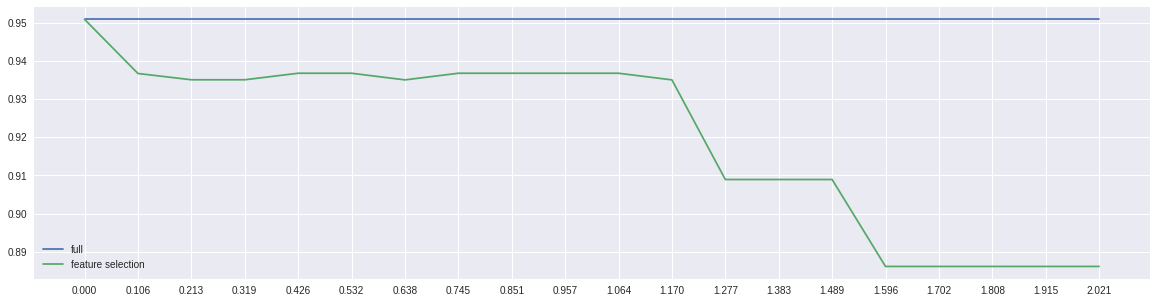

In [18]:
fullx = []
fsx = []
threshold = np.linspace(0,abs((LR_.fit(data.data,data.target).coef_)).max(),20)
k=0
for i in threshold:
    X_embedded = SelectFromModel(LR_,threshold=i).fit_transform(data.data,data.target)
    
    fullx.append(cross_val_score(LR_,data.data,data.target,cv=5).mean())
    
    fsx.append(cross_val_score(LR_,X_embedded,data.target,cv=5).mean())
    print((threshold[k],X_embedded.shape[1]))
#     打印选择特征的个数
    k+=1
plt.figure(figsize=(20,5))
plt.plot(threshold,fullx,label="full")
plt.plot(threshold,fsx,label="feature selection")
plt.xticks(threshold)
plt.legend()
plt.show()

### 调逻辑回归的类LR_，通过画C的学习曲线来实现

0.9563164376458386 8.51


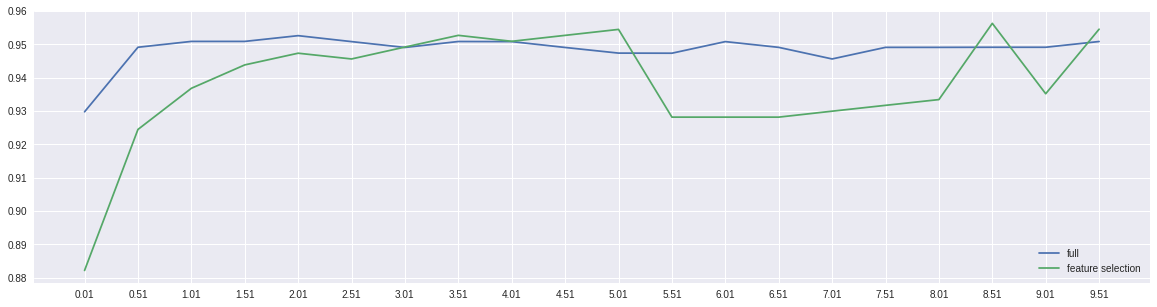

In [20]:
fullx = []
fsx = []
C=np.arange(0.01,10.01,0.5)
for i in C:
    LR_ = LR(solver="liblinear",C=i,random_state=420)
    fullx.append(cross_val_score(LR_,data.data,data.target,cv=10).mean())
    X_embedded = SelectFromModel(LR_,norm_order=1).fit_transform(data.data,data.target)
    fsx.append(cross_val_score(LR_,X_embedded,data.target,cv=10).mean())
    
print(max(fsx),C[fsx.index(max(fsx))])
plt.figure(figsize=(20,5))
plt.plot(C,fullx,label="full")
plt.plot(C,fsx,label="feature selection")
plt.xticks(C)
plt.legend()
plt.show()

0.9563164376458386 8.025000000000002


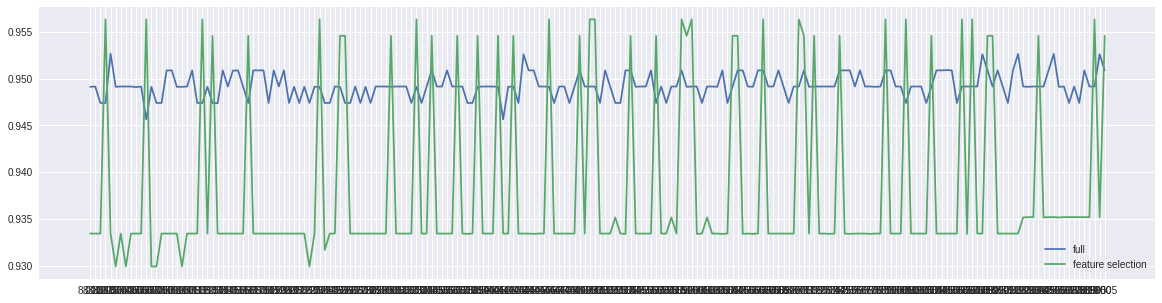

In [25]:
fullx = []
fsx = []
C=np.arange(8.01,9.01,0.005)
for i in C:
    LR_ = LR(solver="liblinear",C=i,random_state=420)
    fullx.append(cross_val_score(LR_,data.data,data.target,cv=10).mean())
    X_embedded = SelectFromModel(LR_,norm_order=1).fit_transform(data.data,data.target)
    fsx.append(cross_val_score(LR_,X_embedded,data.target,cv=10).mean())
print(max(fsx),C[fsx.index(max(fsx))])
plt.figure(figsize=(20,5))
plt.plot(C,fullx,label="full")
plt.plot(C,fsx,label="feature selection")
plt.xticks(C)
plt.legend()
plt.show()

In [26]:
#验证模型效果：降维之前
LR_ = LR(solver="liblinear",C=8.025000000000002,random_state=420)
cross_val_score(LR_,data.data,data.target,cv=10).mean()

0.9473911070780398

In [27]:
#验证模型效果：降维之后
LR_ = LR(solver="liblinear",C=8.025000000000002,random_state=420)
X_embedded = SelectFromModel(LR_,norm_order=1).fit_transform(data.data,data.target)
cross_val_score(LR_,X_embedded,data.target,cv=10).mean()

0.9563164376458386

In [28]:
X_embedded.shape

(569, 9)

# 梯度下降：重要参数max_iter

In [29]:
l2 = []
l2test = []
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3,random_state=420)
for i in np.arange(1,201,10):
    lrl2 = LR(penalty="l2",solver="liblinear",C=0.9,max_iter=i)
    lrl2 = lrl2.fit(Xtrain,Ytrain)
    l2.append(accuracy_score(lrl2.predict(Xtrain),Ytrain))
    l2test.append(accuracy_score(lrl2.predict(Xtest),Ytest))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


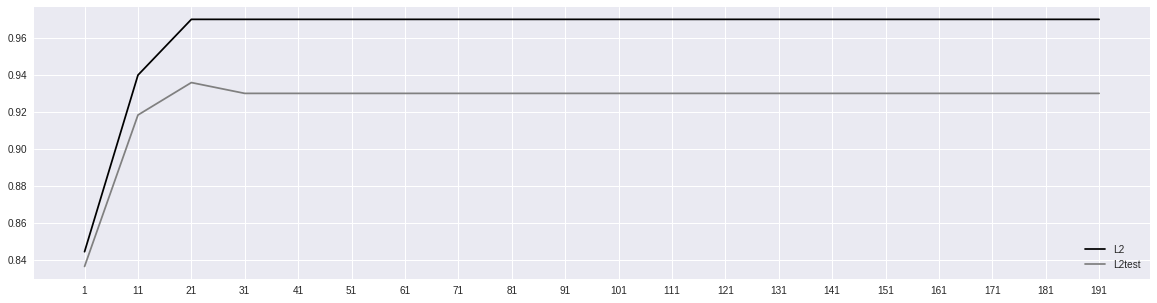

In [30]:
graph = [l2,l2test]
color = ["black","gray"]
label = ["L2","L2test"]
plt.figure(figsize=(20,5))
for i in range(len(graph)):
    plt.plot(np.arange(1,201,10),graph[i],color[i],label=label[i])
plt.legend(loc=4)
plt.xticks(np.arange(1,201,10))
plt.show()

In [31]:
#我们可以使用属性.n_iter_来调用本次求解中真正实现的迭代次数
lr = LR(penalty="l2",solver="liblinear",C=0.9,max_iter=300).fit(Xtrain,Ytrain)
lr.n_iter_

array([24], dtype=int32)

# 二元回归与多元回归：重要参数solver & multi_class

In [35]:
from sklearn.datasets import load_iris
iris = load_iris()
for multi_class in ('multinomial', 'ovr'):
    clf = LR(solver='sag', max_iter=100, random_state=42,
                            multi_class=multi_class).fit(iris.data, iris.target)
#打印两种multi_class模式下的训练分数
#%的用法，用%来代替打印的字符串中，想由变量替换的部分。%.3f表示，保留三位小数的浮点数。%s表示，字符串。
#字符串后的%后使用元祖来容纳变量，字符串中有几个%，元祖中就需要有几个变量
    print("training score : %.3f (%s)" % (clf.score(iris.data, iris.target),multi_class))

training score : 0.987 (multinomial)
training score : 0.960 (ovr)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


# 样本不平衡与参数class_weight